# Generate a Simulated Data Tensor

This notebook demonstrates how to generate a simulated data tensor using the `simulated_sparse_tensor()` function of the `Barnacle` library. In this example we generate a mode-3 data tensor from 5 sparse simulated components. We use the `barnacle.visualize_3d_tensor()` function to visualize the simulated data tensor, as well as the components used to generate the simulation, and we use the `barnacle.plot_factors_heatmap()` to visualize the factors matrices used to generate the simulation components.

In [1]:
# imports

import numpy as np
import scipy
import tensorly as tl
from barnacle import (
    visualize_3d_tensor, 
    simulated_sparse_tensor, 
    plot_factors_heatmap
)


In [2]:
# generate simulated data tensor

true_rank = 5
true_shape = [15, 20, 10]
true_densities = [.4, .2, .6]

# re-seed simulated data until all factor matrices are full rank
full_rank = False
while not full_rank:
    # generate simulated tensor
    sim_tensor = simulated_sparse_tensor(
        shape=true_shape,                
        rank=true_rank,                         
        densities=true_densities, 
        factor_dist_list=[
            scipy.stats.uniform(), 
            scipy.stats.uniform(loc=-1, scale=2),   
            scipy.stats.uniform()
        ], 
        random_state=9481
    )
    # check that all factors are full rank
    full_rank = np.all([np.linalg.matrix_rank(factor) == true_rank for factor in sim_tensor.factors])

# ensure that factor matrices are full rank
for factor in sim_tensor.factors:
    print(np.linalg.matrix_rank(factor))
    

5
5
5


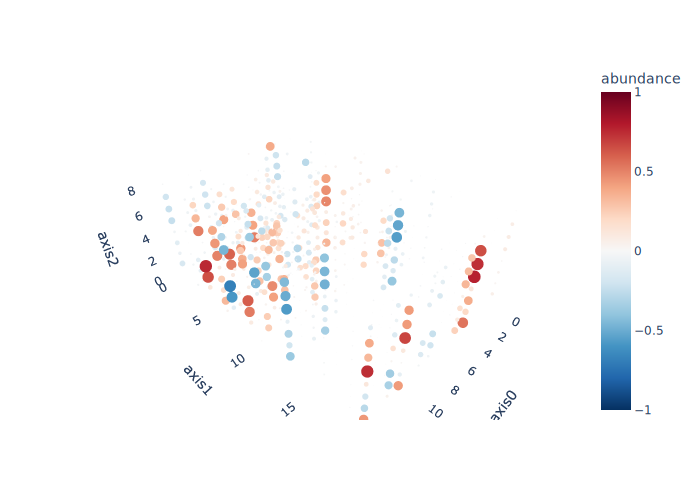

In [3]:
# visualize simulated tensor data

fig = visualize_3d_tensor(
    sim_tensor.to_tensor(),
    shell=False, 
    midpoint=0, 
    show_colorbar=True,
    label_axes=True, 
    range_color=[-1, 1], 
    opacity=1, 
)

fig.show(renderer='svg')


In [4]:
# # visualize each individual component used to generate the simulated data tensor

# for i in range(true_rank):
#     component = sim_tensor.get_components()[i]
#     fig = visualize_3d_tensor(
#         component.to_tensor(), 
#         shell=False, 
#         midpoint=0, 
#         show_colorbar=False,
#         label_axes=True, 
#         range_color=[-1, 1], 
#         opacity=1
#     )
#     print(f'Component {i}')
#     fig.show()


In [5]:
# # visualize the factor matrices used to generate the simulated data tensor

# heatmap_params = {'vmin':-1, 'vmax':1, 'cmap':'seismic', 'center':0}
# fig, ax = plot_factors_heatmap(
#     tl.cp_normalize(sim_tensor).factors, 
#     mask_thold=[0, 0], 
#     ratios=True, 
#     heatmap_kwargs=heatmap_params
# )
